In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
if __name__ == "__main__":
    training = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
    test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [6]:
import nltk

In [7]:
from nltk.corpus import stopwords, wordnet
stop = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter, defaultdict

import spacy


import en_core_web_sm

# For customizing our plots.
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Core packages for general use throughout the notebook.
import random
import warnings
import time
import datetime
import re
import string

In [8]:
display(training.head(5))

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Text to lowercase**

In [9]:
training['text'] = training['text'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
training['text']

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

**Remove punctuations**

In [10]:
import re
training['text'] = [re.sub('[^\w\s]+', '', s) for s in training['text']]

In [14]:
training['text'].tail(10)

7603    officials say a quarantine is in place at an a...
7604    worldnews fallen powerlines on glink tram upda...
7605    on the flip side im at walmart and there is a ...
7606    suicide bomber kills 15 in saudi security site...
7607    stormchase violent record breaking ef5 el reno...
7608    two giant cranes holding a bridge collapse int...
7609    aria_ahrary thetawniest the out of control wil...
7610    m194 0104 utc5km s of volcano hawaii httptcozd...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, dtype: object

**Removing stopwords**

In [15]:
from nltk.corpus import stopwords
 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_words = set(stopwords.words('english'))
training['text'] = training['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [17]:
training['text'].tail(5)

7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, dtype: object

**Correcting spelling**

In [27]:
training.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
5,8,NaN,NaN,rockyfire update california hwy 20 closed dire...,1
6,10,NaN,NaN,flood disaster heavy rain causes flash floodin...,1
7,13,NaN,NaN,im top hill see fire woods,1
8,14,NaN,NaN,theres emergency evacuation happening building...,1
9,15,NaN,NaN,im afraid tornado coming area,1


In [12]:
training.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [28]:
#finding missing values 
missing_values=training.isnull().sum()
percent_missing = training.isnull().sum()/training.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.000000
keyword,61,0.801261
location,2533,33.272035
text,0,0.000000
target,0,0.000000


In [29]:
#removing duplicate values
training = training.drop_duplicates(subset=['text','target'],keep='first')
training.shape

(7511, 5)

In [31]:
#number of word for each sample in training and test 
training['text_length'] = training.text.apply(lambda x: len(x.split()))
test['text_length'] = test.text.apply(lambda x: len(x.split()))


In [32]:
training['text_length'].describe()

count    7511.000000
mean       10.027426
std         3.718603
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        25.000000
Name: text_length, dtype: float64

In [14]:
training['text_length'].describe()

count    7521.000000
mean       14.880202
std         5.736606
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: text_length, dtype: float64

In [33]:
training.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [17]:
print(result)

  (0, 1851)	0.20774599724870962
  (0, 19774)	0.24404025647189032
  (0, 7661)	0.4178812626424706
  (0, 1852)	0.3658714305398719
  (0, 12141)	0.2584687996982438
  (0, 6379)	0.29074229991127976
  (0, 18777)	0.17952750995266226
  (0, 13681)	0.12023464317397538
  (0, 15678)	0.3257591726358076
  (0, 18669)	0.10160032010268577
  (0, 2192)	0.18980986942553624
  (0, 5490)	0.4178812626424706
  (0, 14003)	0.25235173680965334
  (1, 3843)	0.38479775821270434
  (1, 16611)	0.487560233914077
  (1, 16266)	0.487560233914077
  (1, 11091)	0.35858119138310907
  (1, 13122)	0.3144959708197705
  (1, 7439)	0.2372130093544077
  (1, 7652)	0.3045365718648648
  (2, 7014)	0.21632450542156031
  (2, 13936)	0.22502472827574901
  (2, 13919)	0.1400917681611081
  (2, 6909)	0.18438684057707821
  (2, 13987)	0.18861359003989703
  :	:
  (7519, 9170)	0.27743057385499814
  (7519, 13123)	0.3127890518478542
  (7519, 9134)	0.3364611148513483
  (7519, 4974)	0.3491875164861288
  (7519, 3474)	0.29706952105940637
  (7519, 8186)	0.328

In [18]:
print(result.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
print(training['text'].head(10))

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy 20 closed dire...
6    flood disaster heavy rain causes flash floodin...
7                           im top hill see fire woods
8    theres emergency evacuation happening building...
9                        im afraid tornado coming area
Name: text, dtype: object


In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

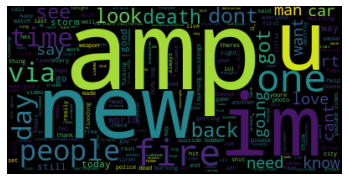

In [41]:
text = " ".join(training['text'])

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
training.head(5)

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,7
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7
2,5,NaN,NaN,residents asked shelter place notified officer...,1,11
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,7
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,9


In [43]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [44]:
# Iterating through the .csv data file 
for i in training.text: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      


In [47]:
#collecting all words in a singly list
list_= []
for i in training.text:
    list_ += i
list_= ''.join(list_)
allWords=list_.split()
vocabulary= set(allWords)

In [48]:
len(vocabulary)

23451

In [30]:
def create_corpus(training,target):
    corpus=[]
    
    for x in training[training['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<AxesSubplot:>

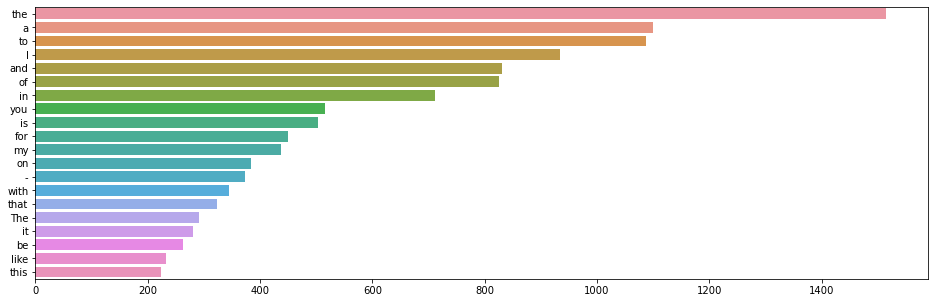

In [31]:
import collections
allWords=create_corpus(training,target=0)
vocabulary= set(allWords)
vocabulary_list= list(vocabulary)

plt.figure(figsize=(16,5))
counter=collections.Counter(allWords)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
  x.append(word)
  y.append(count)
sns.barplot(x=y,y=x)

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
#collecting all words in a single list
list_= []
for i in training.clean:
    list_ += i
list_= ''.join(list_)
allWords=list_.split()
vocabulary= set(allWords)
len(vocabulary)

20163

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
result  = tfidf.fit_transform(training['text'])

In [50]:
result = result.toarray()

In [51]:
result.shape

(7511, 22542)

In [38]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,max_features=60000, min_df=1, norm='l2',  ngram_range=(1,2))
features = tfidf.fit_transform(training.clean).toarray()
features.shape


(7521, 60000)

In [53]:
features_test = tfidf.transform(test).toarray()

In [54]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [55]:
training_vectors = cv.fit_transform(training['text'])
test_vectors = cv.transform(test["text"])


In [56]:

## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_vectors, training['target'], test_size=0.33, random_state=0,shuffle = True)


In [58]:

## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))

training_vectors_tfidf = tfidf_v.fit_transform(training['text'])
test_vectors_tfidf = tfidf_v.transform(test["text"])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(training_vectors_tfidf, training['target'], test_size=0.33, random_state=0)

In [59]:
from sklearn.naive_bayes import MultinomialNB
classifier_count=MultinomialNB()


## applied with countVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
classifier_count.fit(X_train, y_train)
pred = classifier_count.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
#plt_confusion_matrix(cm, classes=['NON_DISASTER', 'DISASTER'])

accuracy:   0.797


In [60]:
classifier_tfidf=MultinomialNB()

## applied with TfidfVectorizer
classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
pred = classifier_tfidf.predict(X_test_tfidf)
score = metrics.accuracy_score(y_test_tfidf, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test_tfidf, pred)

accuracy:   0.791


In [61]:
def submission(submission_file_path,model,test_vectors):
    sample_submission = pd.read_csv(submission_file_path)
    sample_submission["target"] = model.predict(test_vectors)
    sample_submission.to_csv("submission.csv", index=False)

In [62]:
submission_file_path = "../input/nlp-getting-started/sample_submission.csv"
test_vectors=test_vectors_tfidf
submission(submission_file_path,classifier_tfidf,test_vectors)

In [63]:
from sklearn.naive_bayes import MultinomialNB
target_model = MultinomialNB().fit(training_vectors_tfidf, training['target'])


In [64]:
print('expected:', training.target[9])

expected: 1


In [65]:

sample_submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sample_submission['target'] = target_model.predict(test_vectors_tfidf)
sample_submission.head(5)

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [66]:
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)

In [67]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv